In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [318]:
df = pd.read_excel("Copy of loan.xlsx")

In [319]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [321]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [322]:
df.shape

(614, 13)

In [323]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [324]:
df = df.dropna()
print(df.shape)

(480, 13)


In [325]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

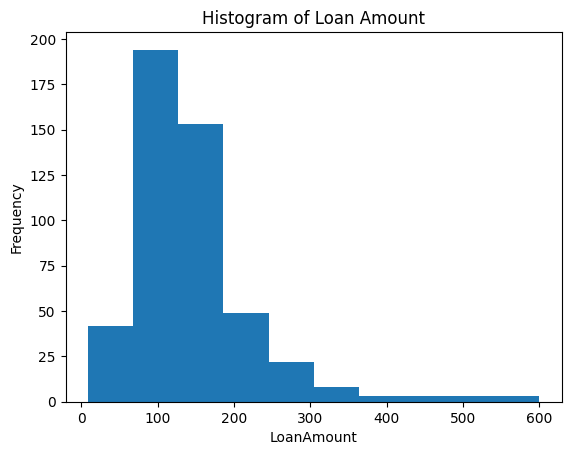

In [326]:
plt.hist(df['LoanAmount'])
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')
plt.show()

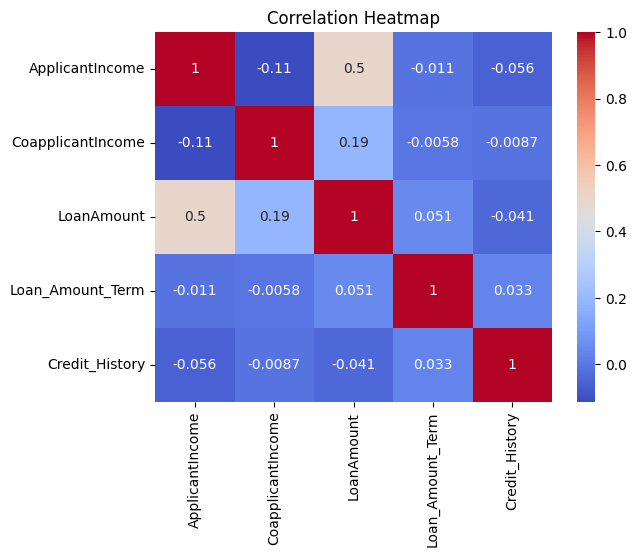

In [327]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [328]:
df['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [329]:
df['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [330]:
df['Married'].value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [331]:
df['Self_Employed'].value_counts()

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

In [332]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [333]:
X = df.drop(columns=['Loan_Status', 'Loan_ID', 'Dependents'])
y = df['Loan_Status']

In [334]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Random Forest Classifier

In [336]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred_rf)
RF_confusion = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Classifier:")
print(f"Accuracy: {RF_accuracy * 100}")
print("Confusion Matrix:\n", RF_confusion)

Random Forest Classifier:
Accuracy: 77.08333333333334
Confusion Matrix:
 [[ 7  9]
 [ 2 30]]


Logistic Regression

In [337]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
LR_accuracy = accuracy_score(y_test, y_pred_lr)
LR_confusion = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression:")
print(f"Accuracy: {LR_accuracy * 100}")
print("Confusion Matrix:\n", LR_confusion)

Logistic Regression:
Accuracy: 81.25
Confusion Matrix:
 [[ 7  9]
 [ 0 32]]


Support Vector Machine

In [338]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
SVC_accuracy = accuracy_score(y_test, y_pred_svc)
SVC_confusion = confusion_matrix(y_test, y_pred_svc)
print("Support Vector Machine:")
print(f"Accuracy: {SVC_accuracy * 100}")
print("Confusion Matrix:\n", SVC_confusion)

Support Vector Machine:
Accuracy: 81.25
Confusion Matrix:
 [[ 7  9]
 [ 0 32]]


In [339]:
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Support Vector Machine Report:")
print(classification_report(y_test, y_pred_svc))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.78      0.44      0.56        16
           1       0.77      0.94      0.85        32

    accuracy                           0.77        48
   macro avg       0.77      0.69      0.70        48
weighted avg       0.77      0.77      0.75        48

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        16
           1       0.78      1.00      0.88        32

    accuracy                           0.81        48
   macro avg       0.89      0.72      0.74        48
weighted avg       0.85      0.81      0.79        48

Support Vector Machine Report:
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        16
           1       0.78      1.00      0.88        32

    accuracy                           0.81        48
   macro avg       0.89      0.72   

In [340]:

# Create an XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=200,  # Number of boosting rounds
    max_depth=5,       # Maximum tree depth
    learning_rate=0.1, # Learning rate
    subsample=0.8,     # Fraction of samples used for tree building
    colsample_bytree=0.8,  # Fraction of features used for tree building
    random_state=42    # Random seed for reproducibility
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

c:\Users\ricka\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        16
           1       0.78      0.91      0.84        32

    accuracy                           0.77        48
   macro avg       0.76      0.70      0.72        48
weighted avg       0.76      0.77      0.76        48

Confusion Matrix:
[[ 8  8]
 [ 3 29]]
